In [1]:
# Import Important Library
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from keras.applications.resnet50 import ResNet50
import pandas as pd

Using TensorFlow backend.


In [2]:
# Label Path of dog breed
path=r'C:\Users\yogesh yadav\Downloads\Compressed\dog-breed-identification\labels.csv'
df=pd.read_csv(path)
df['id']=df['id']+'.jpg'
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


In [3]:
# To split the label data in to train and valid
from sklearn.model_selection import train_test_split
train_data,valid_data=train_test_split(df,test_size=0.2,random_state=0)

In [4]:
# Path of training and testing image of Dog
train_path=r'C:\Users\yogesh yadav\Downloads\Compressed\dog-breed-identification\train'
test_path=r'C:\Users\yogesh yadav\Downloads\Compressed\dog-breed-identification\test'

In [5]:

train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
valid_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_dataframe(dataframe=train_data,directory=train_path,x_col='id',y_col='breed', target_size=(224, 224),class_mode="categorical",batch_size=128)
valid_set=train_datagen.flow_from_dataframe(dataframe=valid_data,directory=train_path,x_col='id',y_col='breed', target_size=(224,224),class_mode="categorical",batch_size=128)

Found 8177 validated image filenames belonging to 120 classes.
Found 2045 validated image filenames belonging to 120 classes.


In [6]:
# import REsNet Model
model = ResNet50(weights='imagenet')

In [7]:
# Define Image width and height
im_w,im_h=224,224
# path of Test image in your pc
path=r'C:\Users\yogesh yadav\Downloads\Compressed\dog-breed-identification\test\0a30903466bc4f7532843b0ccdd09e2a.jpg'
# to load Image from path you give in your pc
image = load_img(path, target_size=(im_w, im_h))
# chnage image to array
img = img_to_array(image)
img = img.reshape((1, im_w, im_h,3))
img = preprocess_input(img)
# Predict the test image
pred = model.predict(img)

In [8]:
breed_list=['Doberman','beagle','chihuahua','french_bulldog','golden_retriever','malamute','pug','saint_bernard','scottish_deerhound','tibetan_mastiff']

### To Check Breed of test image you provided and also check predicted score

Breed Name:  Doberman
Prediction Score:  0.5649089


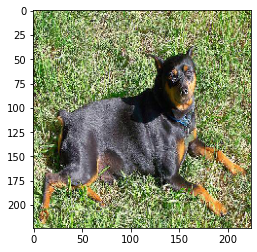

In [9]:
label = decode_predictions(pred,top=1)
print('Breed Name: ',label[0][0][1])
plt.imshow(image)
for i in breed_list:
    if i==str(label[0][0][1]):
        print('Prediction Score: ',label[0][0][2])

## Now Build API

In [10]:
# Import libraries 
from __future__ import division, print_function
# coding=utf-8
import sys
import os
import glob
import re
import numpy as np

### Import Flask 

In [11]:
# Flask utils
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename
from gevent.pywsgi import WSGIServer

In [12]:
# Define Prediction Function
def model_predict(path):
    model=ResNet50(weights='imagenet')
    im_w,im_h=224,224
    image = load_img(path, target_size=(im_w, im_h))
    img= img_to_array(image)
    img = img.reshape((1, im_w, im_h,3))
    img = preprocess_input(img)
    pred = model.predict(img)
    return pred
    

### Path of Upload image will be saved before prediction

In [15]:
# Chnage path according to your PC path
upload_path=r'C:\Users\yogesh yadav\Downloads\Compressed\dog-breed-identification\upload'

In [14]:
app = Flask(__name__)
app.config['upload_path'] = upload_path
@app.route('/', methods=['GET'])
def index():
    # Main page
    return render_template('index.html')


@app.route('/predict', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        # Get the file from post request
        f = request.files['file']

        # Save the file to ./uploads
        file_path = os.path.join(app.config['upload_path'],secure_filename(f.filename))
        f.save(file_path)

        # Make prediction
        preds = model_predict(file_path)

        # Process your result for human
        # pred_class = preds.argmax(axis=-1)            # Simple argmax
        pred_class = decode_predictions(preds, top=1)   # ImageNet Decode
        result = str(pred_class[0][0][1])               # Convert to string
        return result
    return None


if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [18/Mar/2021 03:02:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Mar/2021 03:03:22] "POST /predict HTTP/1.1" 200 -
